Notas:
- Investigar más la relación de rating_qty e year con el rating.

---

# RELATIONSHIP ANALYSIS (ANÁLISIS DE RELACIONES)

El objetivo de esta sección es entender cómo diversas variables se relacionan entre sí.

<br>

Se encarga de responder preguntas como:
- ¿Qué variables tienen mayor correlación con la calidad de un vino?
- ¿Qué sabores se relacionan con cierto maridaje con más frecuencia?
- ¿Existen características de un vino con alta correlación positiva o negativa entre si?

<br>

---

## Configuración General

1. Carga de librerías.
2. Seteo de estilos del notebook.
3. Ingesta del dataset.

In [2]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



sys.path.append(os.path.abspath(os.path.join('..', '..', 'src', 'utils')))
import utils as ut

In [3]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [4]:
wines = pd.read_csv("../../src/data/transformed/wines_clean.csv")
pd.set_option('display.max_columns', None)
wines.head(3)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,0.1410,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.000,0.000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1400,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1416,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 01 | Matrices de Correlación

- ¿Qué variables tienen una alta correlación con el rating de los vinos?
- ¿Qué notas, maridajes y uvas, regions tienen alta correlación con el rating?
- ¿Cambia el panorama al medir correlaciones lineales y no lineales?

---

**Wine Features**

Rating Main Correlations
> - Las variables que mayor correlación tienen con el rating de un vino son el precio y el cuerpo del vino.

> - Sin embargo, será que la calidad del vino determina el precio? O es la percepción de un vino caro que hace que los usuarios lo valoren en mayor medida?

> - Spearman: es notoria la intensificación de correlación con el precio, rating_qty y el año (year), indicando que existe una mayor correlación no lineal.

Otras features
> - Respecto al restro de features, vemos como:
>   - El cuerpo (body) de un vino se relaciona con una mayor cantidad de alcohol.
>   - Los taninos y la acidez van de la mano.
>   - El año tiene una correlación no lineal negativa con el rating y el precio, indicando mejores vinos añejados a priori.

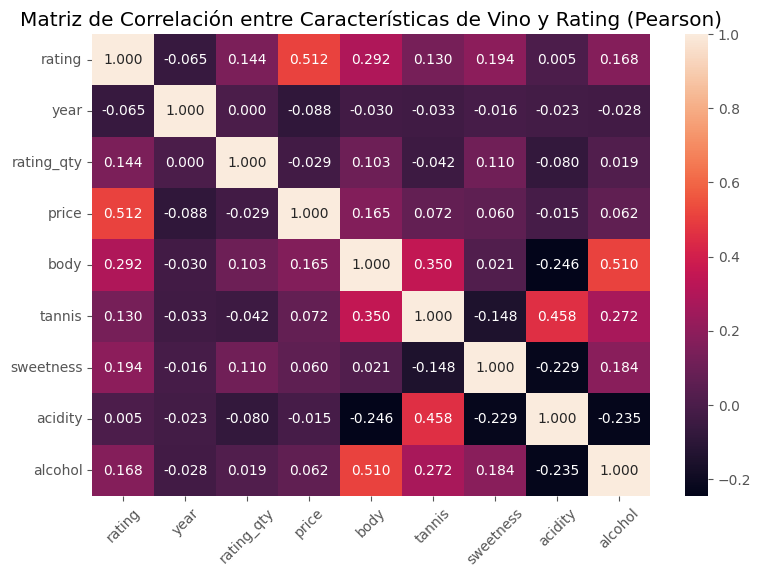

Correlación con rating:
rating        1.000000
price         0.511772
body          0.292035
sweetness     0.193857
alcohol       0.167849
rating_qty    0.143818
tannis        0.129703
acidity       0.005483
year         -0.064924
Name: rating, dtype: float64


In [5]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Correlación de pearson con rating:
wine_features = ["rating", "year", "rating_qty", "price", "body", "tannis", "sweetness", "acidity", "alcohol"]

corr_features = wines[wine_features].corr()

sns.heatmap(corr_features, annot=True, fmt=".3f")
plt.title("Matriz de Correlación entre Características de Vino y Rating (Pearson)")
plt.xticks(rotation=45)
plt.show()

corr_rating_features = corr_features["rating"].sort_values(ascending=False)
print(f"Correlación con rating:\n{corr_rating_features}")

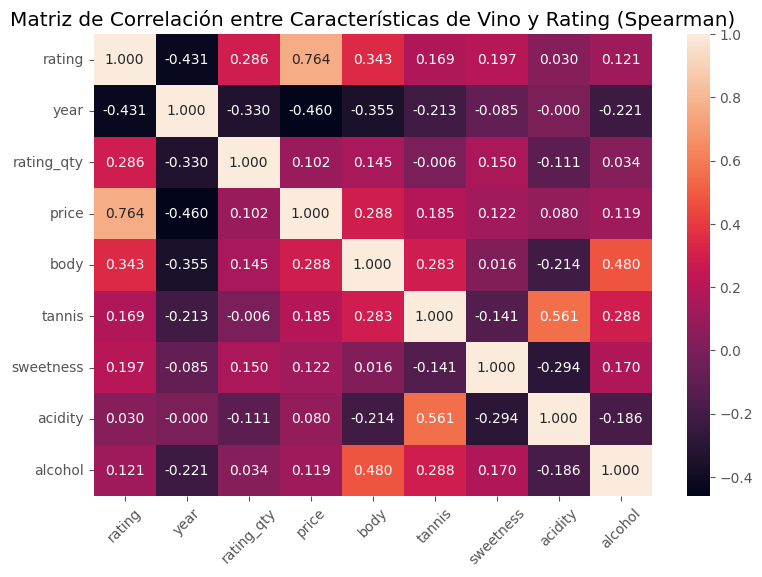

Correlación de Spearman con rating:
rating        1.000000
price         0.764331
body          0.342666
rating_qty    0.286181
sweetness     0.197238
tannis        0.169234
alcohol       0.120617
acidity       0.030335
year         -0.431385
Name: rating, dtype: float64


In [6]:
# Correlación de Spearman con rating:
corr_features_spear = wines[wine_features].corr(method="spearman")

sns.heatmap(corr_features_spear, annot=True, fmt=".3f")
plt.title("Matriz de Correlación entre Características de Vino y Rating (Spearman)")
plt.xticks(rotation=45)
plt.show()

corr_rating_features_spr = corr_features_spear["rating"].sort_values(ascending=False)
print(f"Correlación de Spearman con rating:\n{corr_rating_features_spr}")

In [7]:
corr_rating_features.to_frame().join(corr_rating_features_spr.to_frame(), lsuffix="_pearson", rsuffix="_spearman")

,rating_pearson,rating_spearman
rating,1.000000,1.000000
price,0.511772,0.764331
body,0.292035,0.342666
sweetness,0.193857,0.197238
alcohol,0.167849,0.120617
rating_qty,0.143818,0.286181
tannis,0.129703,0.169234
acidity,0.005483,0.030335
year,-0.064924,-0.431385


**Notes**

> Highlights de notes con ratings

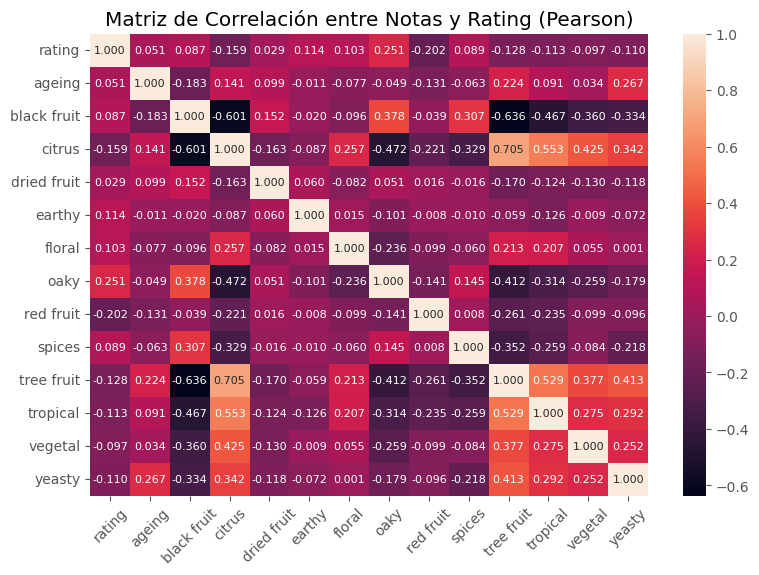

Correlación de Pearson con rating:
rating         1.000000
oaky           0.251047
earthy         0.114037
floral         0.102828
spices         0.089443
black fruit    0.086946
ageing         0.050540
dried fruit    0.029036
vegetal       -0.096512
yeasty        -0.110117
tropical      -0.113256
tree fruit    -0.127808
citrus        -0.158543
red fruit     -0.202485
Name: rating, dtype: float64


In [8]:
notes = pd.read_csv("../../src/data/processed/aux/notes.csv")
notes = notes["notes"].to_list()
notes.insert(0,"rating")
corr_notes = wines[notes].corr()
sns.heatmap(corr_notes, annot=True, fmt=".3f", annot_kws={"size":8})
plt.title("Matriz de Correlación entre Notas y Rating (Pearson)")
plt.xticks(rotation=45)
plt.show()

corr_notes_rating = corr_notes["rating"].sort_values(ascending=False)
print(f"Correlación de Pearson con rating:\n{corr_notes_rating}")

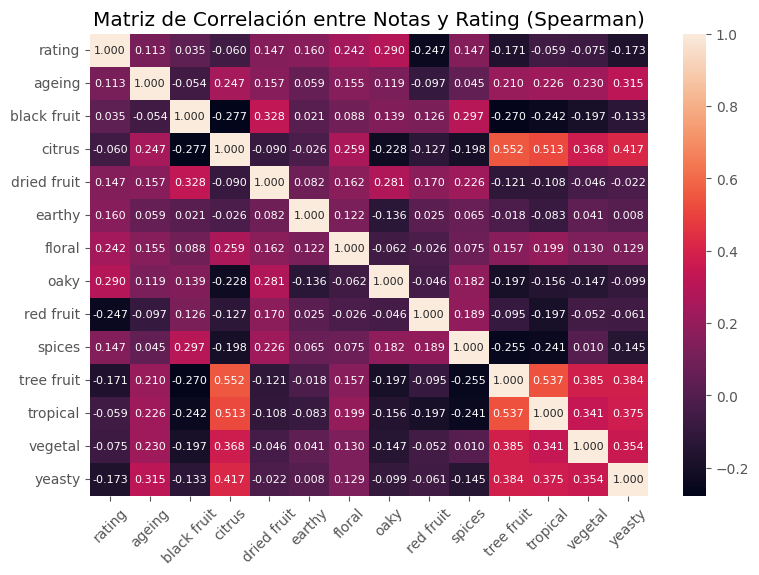

Correlación de Spearman con rating:
rating         1.000000
oaky           0.289829
floral         0.242339
earthy         0.159811
dried fruit    0.146974
spices         0.146932
ageing         0.112755
black fruit    0.035086
tropical      -0.058890
citrus        -0.059896
vegetal       -0.074789
tree fruit    -0.171037
yeasty        -0.172726
red fruit     -0.246677
Name: rating, dtype: float64


In [9]:
corr_notes_spear = wines[notes].corr(method="spearman")
sns.heatmap(corr_notes_spear, annot=True, fmt=".3f", annot_kws={"size":8})
plt.title("Matriz de Correlación entre Notas y Rating (Spearman)")
plt.xticks(rotation=45)
plt.show()

corr_notes_rating_spr = corr_notes_spear["rating"].sort_values(ascending=False)
print(f"Correlación de Spearman con rating:\n{corr_notes_rating_spr}")

In [10]:
corr_notes_rating.to_frame().join(corr_notes_rating_spr.to_frame(), lsuffix="_pearson", rsuffix="_spearman")

,rating_pearson,rating_spearman
rating,1.000000,1.000000
oaky,0.251047,0.289829
earthy,0.114037,0.159811
floral,0.102828,0.242339
spices,0.089443,0.146932
black fruit,0.086946,0.035086
ageing,0.050540,0.112755
dried fruit,0.029036,0.146974
vegetal,-0.096512,-0.074789
yeasty,-0.110117,-0.172726


**Pairings**

> Highlights de Pairings con ratings

## Seccion 2

---

### Rating - Rating Quantity

- Los vinos con muchos ratings tienen mayor valoración por parte de los usuarios?
- La gran cantidad de ratings explican la calidad de un vino?

<br>

> No parece haber una relación lineal clara entre la cantidad de ratings y el rating en si de un vino (R^2 es 0.02).

> Sí parece que hay bastantes vinos donde la cantidad de ratings es mayor y que rondan en un rating de al rededor de 4.1.

> Sin embargo, Rating Quantity no parece ser una variable que explique linealmente al Rating.

<br>

---

coef: [[3.42120942e-05]]
intercept: [3.9938092]
R^2: 0.020683520070978068
Correlation: 0.14381766258348844


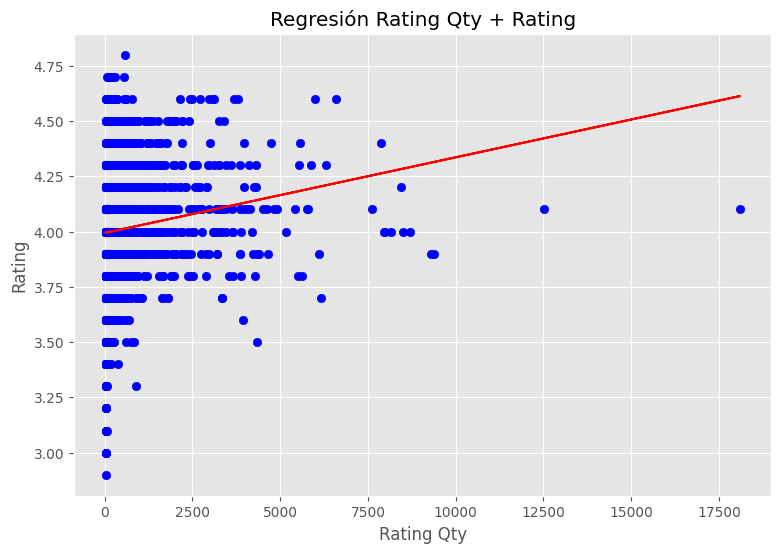

In [11]:
# LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
# Correlation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
rating_qty = np.array(wines["rating_qty"]).reshape(-1, 1)
rating = np.array(wines["rating"]).reshape(-1, 1)
regresor_lin = LinearRegression()
regresor_lin.fit(rating_qty, rating)
score = regresor_lin.score(rating_qty, rating)
corr = wines["rating_qty"].corr(wines["rating"])
print(f"coef: {regresor_lin.coef_}")
print(f"intercept: {regresor_lin.intercept_}")
print(f"R^2: {score}")
print(f"Correlation: {corr}")
rating_pred = regresor_lin.predict(rating_qty)
plt.scatter(rating_qty, rating, color="blue")
plt.plot(rating_qty, rating_pred, color="red")
plt.xlabel("Rating Qty")
plt.ylabel("Rating")
plt.title("Regresión Rating Qty + Rating")
plt.show()

### Price-Quality (Precio-Calidad)

---

In [12]:
scaler = MinMaxScaler()
wines[["rating_scaled", "price_scaled"]] = scaler.fit_transform(wines[["rating", "price"]])
wines['price_quality_scaled'] = wines['rating_scaled'] / wines['price_scaled']
wines_filtrados = wines[wines['price'] > 0].copy()
wines_filtrados['log_price'] = np.log1p(wines_filtrados['price'])
wines_filtrados['calidad_precio_log'] = wines_filtrados['rating'] / wines_filtrados['log_price']

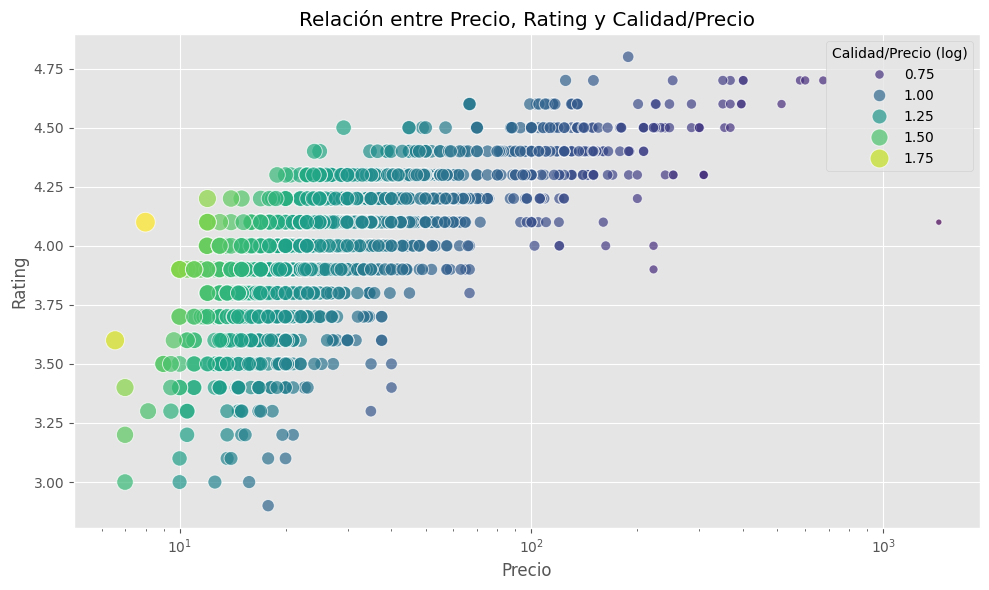

In [13]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=wines_filtrados,
    x="price",
    y="rating",
    hue="calidad_precio_log",
    palette="viridis",
    size="calidad_precio_log",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Relación entre Precio, Rating y Calidad/Precio")
plt.xlabel("Precio")
plt.ylabel("Rating")
plt.legend(title="Calidad/Precio (log)")
plt.xscale("log")  
plt.grid(True)
plt.tight_layout()
plt.show()


/home/martingut27/WineRecommendation/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/home/martingut27/WineRecommendation/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/home/martingut27/WineRecommendation/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/home/martingut27/WineRecommendation/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


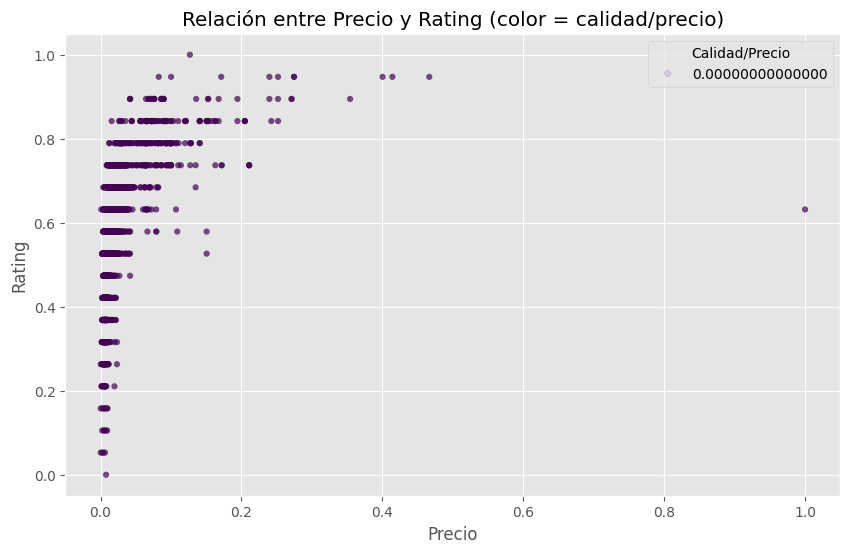

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wines, x='price_scaled', y='rating_scaled', hue='price_quality_scaled',
                palette='viridis', size='price_quality_scaled', sizes=(20, 200), alpha=0.7)

plt.title('Relación entre Precio y Rating (color = calidad/precio)')
plt.xlabel('Precio')
plt.ylabel('Rating')
plt.legend(title='Calidad/Precio')
plt.grid(True)
plt.show()


## Relaciones entre caracteristicas de los vinos y maridajes

- Relaciones entre perfiles de sabor y maridajes
- Notas de sabor más frecuentes y su relación con maridajes
- Patrones entre tipos de uva  más comunes y maridajes

<br>
<br>

---

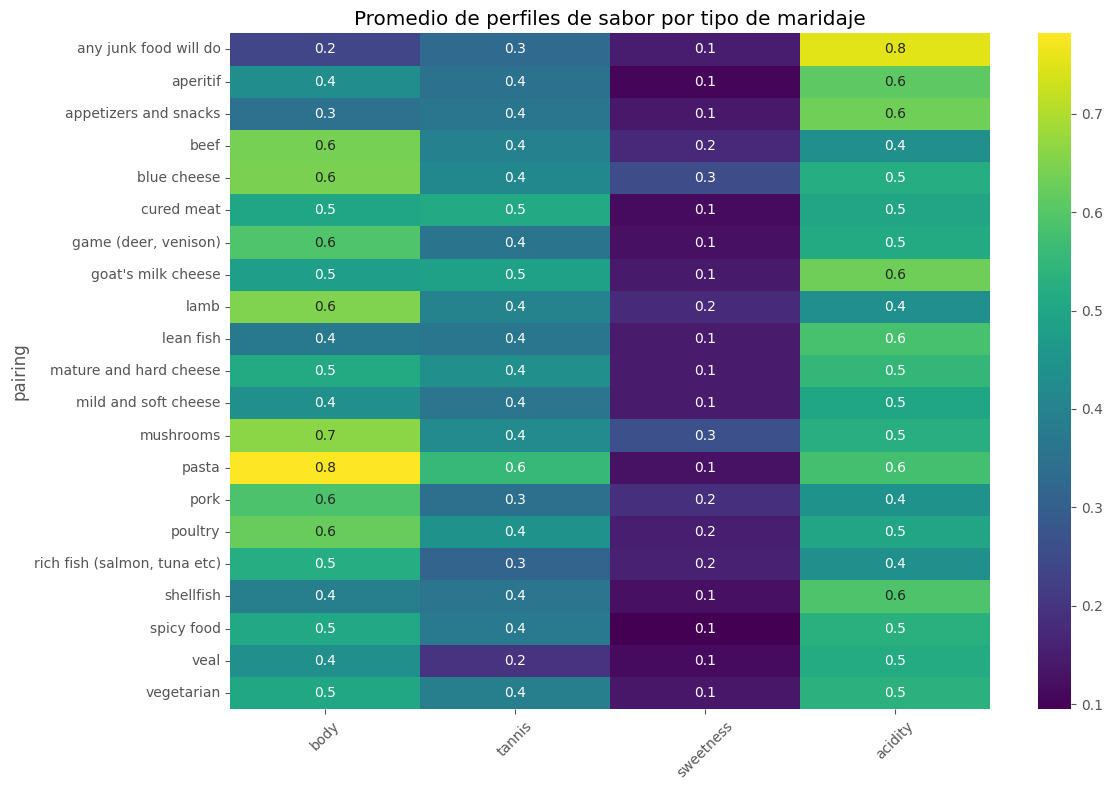

In [15]:
taste_cols = ['body', 'tannis', 'sweetness', 'acidity']

pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]
melted = wines.melt(id_vars=taste_cols, 
                    value_vars=pairing_cols,
                    var_name='pairing',
                    value_name='is_present')

melted = melted[melted['is_present'] == 1]

taste_by_pairing = melted.groupby('pairing')[taste_cols].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(taste_by_pairing, annot=True, cmap="viridis", fmt=".1f")
plt.title("Promedio de perfiles de sabor por tipo de maridaje")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



- ¿Hay maridajes correlacionados entre si?

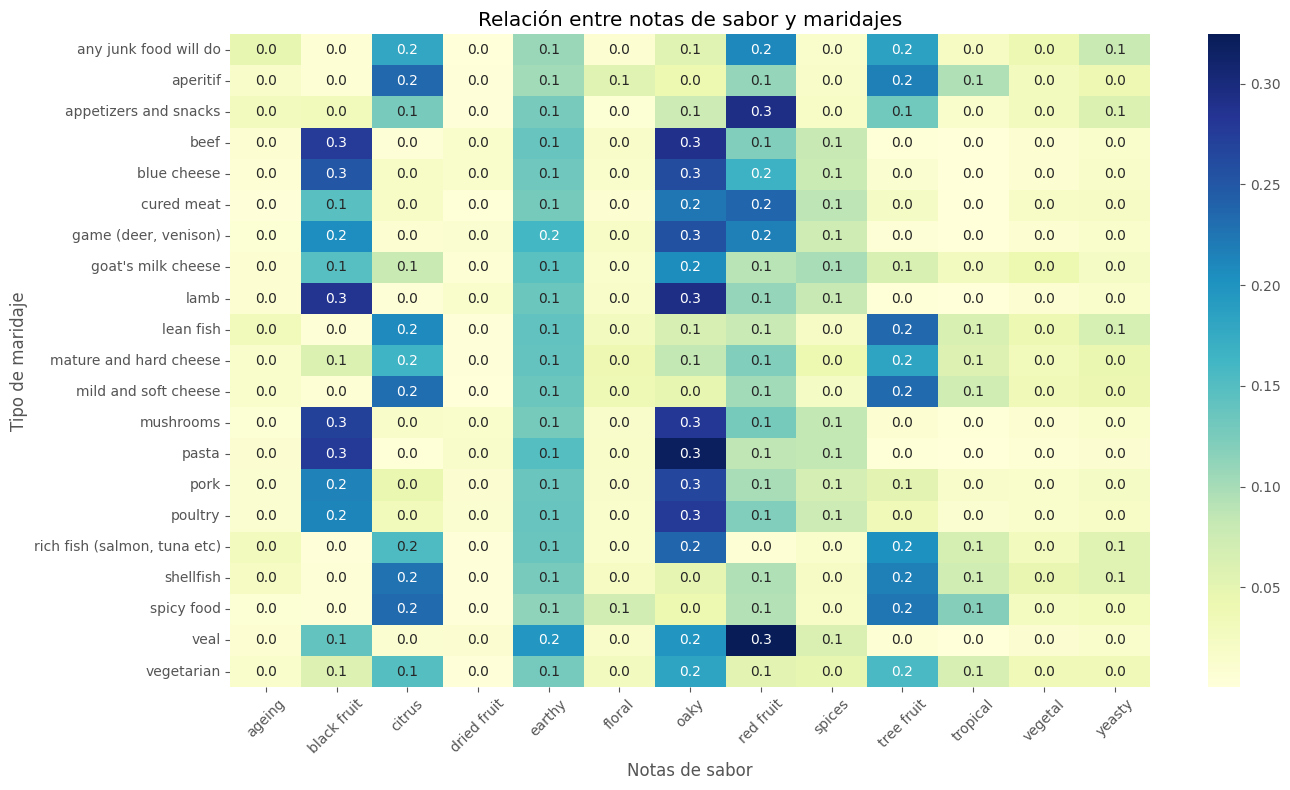

In [16]:
pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]

notes_cols = [
    'ageing', 'black fruit', 'citrus', 'dried fruit', 'earthy', 'floral', 'oaky', 'red fruit',
    'spices', 'tree fruit', 'tropical', 'vegetal', 'yeasty',
]

melted_notes = wines.melt(id_vars=notes_cols, 
                          value_vars=pairing_cols,
                          var_name='pairing',
                          value_name='is_present')


melted_notes = melted_notes[melted_notes['is_present'] == 1]
notes_by_pairing = melted_notes.groupby('pairing')[notes_cols].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(notes_by_pairing, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Relación entre notas de sabor y maridajes")
plt.xlabel("Notas de sabor")
plt.ylabel("Tipo de maridaje")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
grapes_melted = wines.melt(id_vars=pairing_cols,
                           value_vars=grape_cols,
                           var_name='grape',
                           value_name='is_grape')


grapes_melted = grapes_melted[grapes_melted['is_grape'] == 1]
grape_pairing_freq = grapes_melted.groupby('grape')[pairing_cols].mean()
top_grapes = wines[grape_cols].sum().sort_values(ascending=False).head(18).index.tolist()
heatmap_data = grape_pairing_freq.loc[top_grapes]

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relación entre uvas más comunes y maridajes")
plt.xlabel("Tipo de maridaje")
plt.ylabel("Variedad de uva")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'grape_cols' is not defined